<a href="https://colab.research.google.com/github/sunfrancis12/CNN-Assignment-2025/blob/main/ACS111123_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

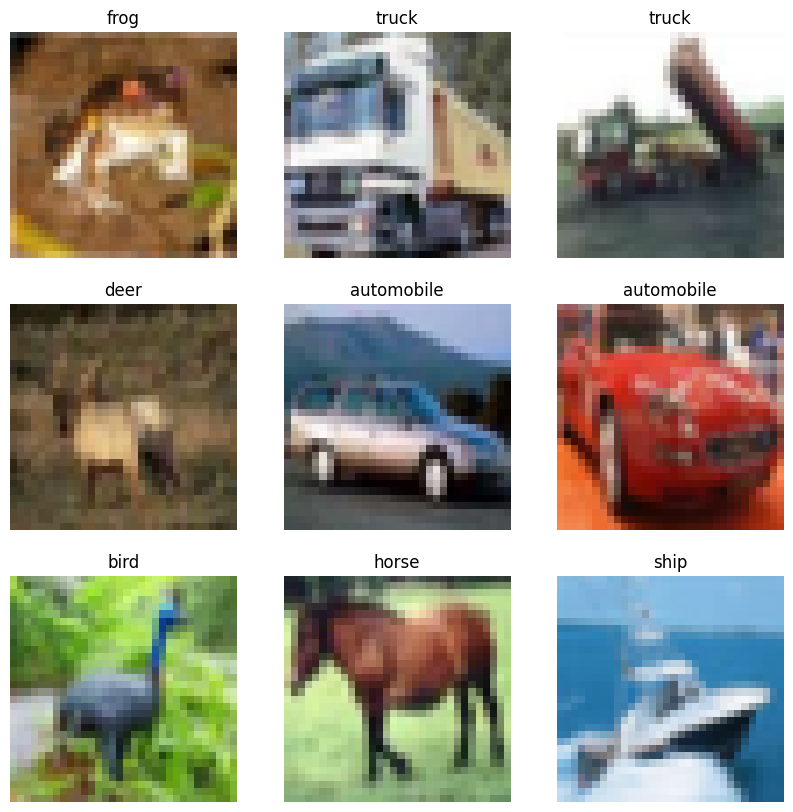

In [ ]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 2: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 3: 128 filters, 3x3 kernel
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    # Flatten the output for dense layers
    layers.Flatten(),
    # Dense Layer: 64 units
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])
# model = models.Sequential([
#     # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     # Convolutional Layer 2: 64 filters, 3x3 kernel
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     # Convolutional Layer 3: 128 filters, 3x3 kernel
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     # Flatten the output for dense layers
#     layers.Flatten(),
#     # Dense Layer: 64 units
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.3),
#     # Output Layer: 10 units (one per class) with softmax
#     layers.Dense(10, activation='softmax')
# ])
# Display model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,322 (1.36 MB)

 Trainable params: 357,066 (1.36 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# Step 5: Compile the Model
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

#導入ImageDataGenerator增加資料多樣性
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,             # 若3個epoch都沒改善則停止
    restore_best_weights=True
)

datagen.fit(train_images)

# 用 datagen.flow() 替代原本 train_images 傳入方式
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=50,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop]
)

# # Step 6: Train the Model
# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.3986 - loss: 1.6731 - val_accuracy: 0.5485 - val_loss: 1.2657
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5633 - loss: 1.2258 - val_accuracy: 0.6045 - val_loss: 1.1353
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6159 - loss: 1.0903 - val_accuracy: 0.6222 - val_loss: 1.1137
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6438 - loss: 1.0066 - val_accuracy: 0.6463 - val_loss: 1.0257
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6717 - loss: 0.9330 - val_accuracy: 0.6904 - val_loss: 0.9045
Epoch 6/50
686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6848 - loss: 0.9003

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


In [ ]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


In [ ]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

# Conclusion


原本的結果:
Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7056
Test Loss: 0.8789
Final Training Accuracy: 0.7727
Final Validation Accuracy: 0.7056
Final Training Loss: 0.6478
Final Validation Loss: 0.8789
Training Epochs: 10
Model Parameters: 122570

* 由於CIFAR-10屬於比較小的資料集，因此我決定先試試看增加卷積層數量
  * 試了一下，效果變更差
* 試試修改filter數量(32->64->128)，讓模型學會更多特徵，並使用TPU加速運算
  * Training Accuracy有滿大的上升(77->85)，Training loss也下降許多(0.6478->0.4147)，但是Validation Accuracy和Test Accuracy進步不大
  * 由於Training Accuracy有著不錯的表現，且loss之間差距也越來越大，再加上模型本身較小，因此推測可能發生過擬和的情況


```
Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7095
Test Loss: 1.0284
Final Training Accuracy: 0.8791
Final Validation Accuracy: 0.7095
Final Training Loss: 0.3452
Final Validation Loss: 1.0284
Training Epochs: 10
Model Parameters: 356810
```

* 導入ImageDataGenerator增加資料多樣性
  * 目前讓他跑了30個epoch，效果看起還不錯，沒有過擬合的情況
    ```
    Model performance saved to model_accuracy.txt
    Model Performance Summary:
    Test Accuracy: 0.7707
    Test Loss: 0.6858
    Final Training Accuracy: 0.7746
    Final Validation Accuracy: 0.7707
    Final Training Loss: 0.6430
    Final Validation Loss: 0.6858
    Training Epochs: 30
    Model Parameters: 356810
    ```
* 接下來試試看50個epoch，並配合early stopping (32 epoch)
  ```
  Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7800
Test Loss: 0.6478
Final Training Accuracy: 0.7866
Final Validation Accuracy: 0.7640
Final Training Loss: 0.6111
Final Validation Loss: 0.7067
Training Epochs: 32
Model Parameters: 356810
  ```

加入 BatchNormalization（提升穩定性與準確率）
```
Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7800
Test Loss: 0.6478
Final Training Accuracy: 0.7866
Final Validation Accuracy: 0.7640
Final Training Loss: 0.6111
Final Validation Loss: 0.7067
Training Epochs: 32
Model Parameters: 356810
```

調大learning rate


* 試試新增Dropout(0.5)，能不能避免過擬合的情況
  * Training Accuracy整體下降，但是看起來過擬合的情況有所改善，試試0.3
  * Test Accuracy有稍微上升，但是Training Accuracy卻下降至81